In [90]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.stats.api as stm
import matplotlib.pyplot as plt
import random

dat = pd.read_csv("D:/Skillbox/Analytics, Middle/Jewelry.csv")
calculator = dat[dat.Variant == 10].reset_index()
calculator['mean'] = calculator['sum(addToCartItems)'] / calculator['cnt(addToCart)']
table = dat[dat.Variant == 90].reset_index()
table['mean'] = table['sum(addToCartItems)'] / table['cnt(addToCart)']

In [52]:
interval = [0.9, 0.95]
for i in interval:
    print(f'Статистика для средней стоимости покупки с вероятностью {i}')
    control_group = stm.DescrStatsW(table['mean']).tconfint_mean(i)
    print(f'Для версии сайта с таблицей {control_group[0]}, {control_group[1]}')
    test_group = stm.DescrStatsW(calculator['mean']).tconfint_mean(i)
    print(f'Для версии сайта с калькулятором {test_group[0]}, {test_group[1]}\n')

Статистика для средней стоимости покупки с вероятностью 0.9
Для версии сайта с таблицей 710.8688641339813, 747.1739864807987
Для версии сайта с калькулятором 799.7331180544481, 829.4770286047635

Статистика для средней стоимости покупки с вероятностью 0.95
Для версии сайта с таблицей 719.9641806595415, 738.0786699552385
Для версии сайта с калькулятором 807.1846913773179, 822.0254552818938



<ipython-input-55-0543c50de4e1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(table['date'], rotation='vertical')
<ipython-input-55-0543c50de4e1>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


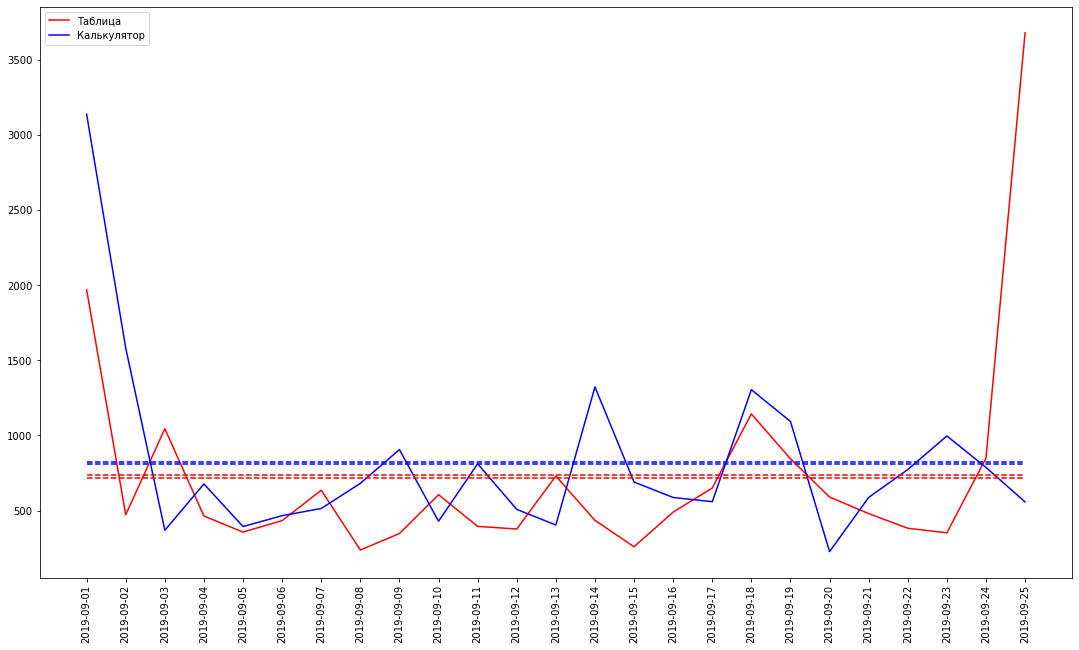

In [55]:
fig=plt.figure()
fig.set_size_inches(18.5, 10.5)
ax=fig.add_subplot(111)
ax.plot(table['date'], table['mean'], c='r', label='Таблица')
ax.plot(calculator['date'], calculator['mean'], c='b', label='Калькулятор')
ax.plot(calculator['date'], [test_group[0] for i in calculator['date']], c='b', ls='--')
ax.plot(calculator['date'], [test_group[1] for i in calculator['date']], c='b', ls='--')
ax.plot(table['date'], [control_group[0] for i in table['date']], c='r', ls='--')
ax.plot(table['date'], [control_group[1] for i in table['date']], c='r', ls='--')
ax.legend()
ax.set_xticklabels(table['date'], rotation='vertical')
fig.show()

In [56]:
interval = [0.9, 0.95]
for i in interval:
    print(f'Статистика для суммарной покупки за день с вероятностью {i}')
    control_group = stm.DescrStatsW(table['sum(addToCartItems)']).tconfint_mean(i)
    print(f'Для версии сайта с таблицей {control_group[0]}, {control_group[1]}')
    test_group = stm.DescrStatsW(calculator['sum(addToCartItems)']).tconfint_mean(i)
    print(f'Для версии сайта с калькулятором {test_group[0]}, {test_group[1]}\n')

Статистика для суммарной покупки за день с вероятностью 0.9
Для версии сайта с таблицей 39137.11957576475, 42067.120424235254
Для версии сайта с калькулятором 37503.288718112446, 39202.47128188755

Статистика для суммарной покупки за день с вероятностью 0.95
Для версии сайта с таблицей 39871.15608120392, 41333.08391879609
Для версии сайта с калькулятором 37928.9752949159, 38776.784705084094



<ipython-input-57-490aa16e434c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(table['date'], rotation='vertical')
<ipython-input-57-490aa16e434c>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


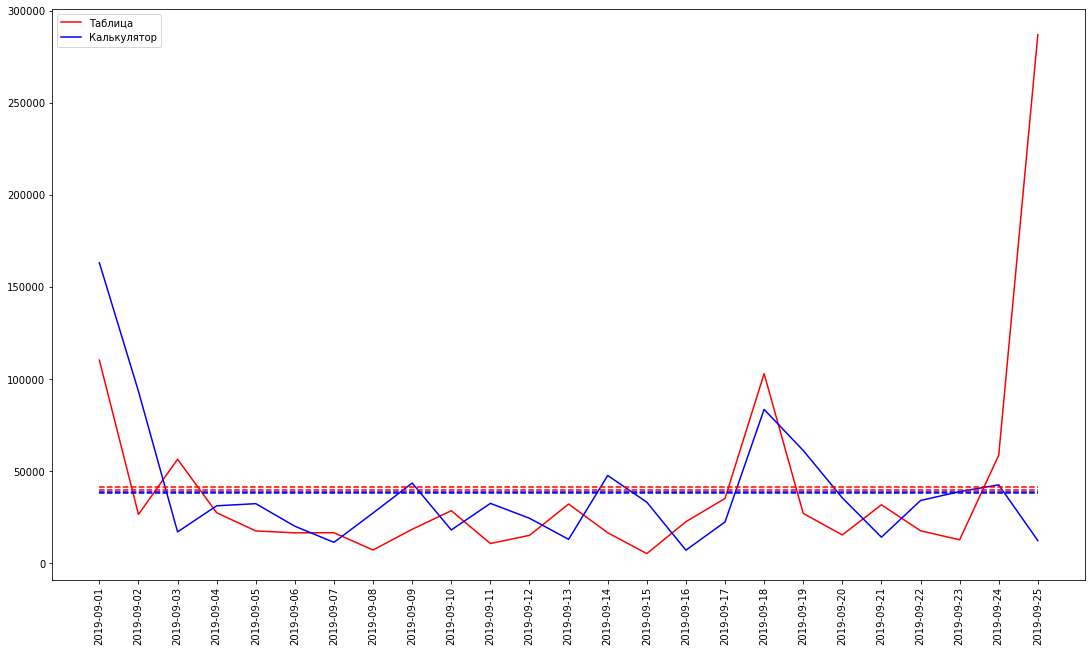

In [57]:
fig=plt.figure()
fig.set_size_inches(18.5, 10.5)
ax=fig.add_subplot(111)
ax.plot(table['date'], table['sum(addToCartItems)'], c='r', label='Таблица')
ax.plot(calculator['date'], calculator['sum(addToCartItems)'], c='b', label='Калькулятор')
ax.plot(calculator['date'], [test_group[0] for i in calculator['date']], c='b', ls='--')
ax.plot(calculator['date'], [test_group[1] for i in calculator['date']], c='b', ls='--')
ax.plot(table['date'], [control_group[0] for i in table['date']], c='r', ls='--')
ax.plot(table['date'], [control_group[1] for i in table['date']], c='r', ls='--')
ax.legend()
ax.set_xticklabels(table['date'], rotation='vertical')
fig.show()

На данный момент по доверительным интервалам "ничья": по средней стоимости покупки лучше вариант при выпадающем калькуляторе, по суммарной покупке - при выпадающей таблице. Отметим выбросы 1 и 25.09. Если 1.09 выброс замечается за обоими случаями, то 25.09 выброс только для одного решения (по-хорошему надо проверить что произошло, возможно ошибка, возможно все решили закупиться кольцами, ведь завтра подорожает). Уберем этот выброс убрав из данных значения за 25.09

In [91]:
table = table.drop([table[table['date']=='2019-09-25'].index[0]])
calculator = calculator.drop([calculator[calculator['date']=='2019-09-25'].index[0]])

In [92]:
interval = [0.9, 0.95]
for i in interval:
    print(f'Статистика для средней стоимости покупки с вероятностью {i}')
    control_group = stm.DescrStatsW(table['mean']).tconfint_mean(i)
    print(f'Для версии сайта с таблицей {control_group[0]}, {control_group[1]}')
    test_group = stm.DescrStatsW(calculator['mean']).tconfint_mean(i)
    print(f'Для версии сайта с калькулятором {test_group[0]}, {test_group[1]}\n')

Статистика для средней стоимости покупки с вероятностью 0.9
Для версии сайта с таблицей 596.4441979740974, 615.7735150060422
Для версии сайта с калькулятором 809.8648609070001, 840.7593448933153

Статистика для средней стоимости покупки с вероятностью 0.95
Для версии сайта с таблицей 601.286689038972, 610.9310239411676
Для версии сайта с калькулятором 817.6047237490443, 833.0194820512711



<ipython-input-93-0543c50de4e1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(table['date'], rotation='vertical')
<ipython-input-93-0543c50de4e1>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


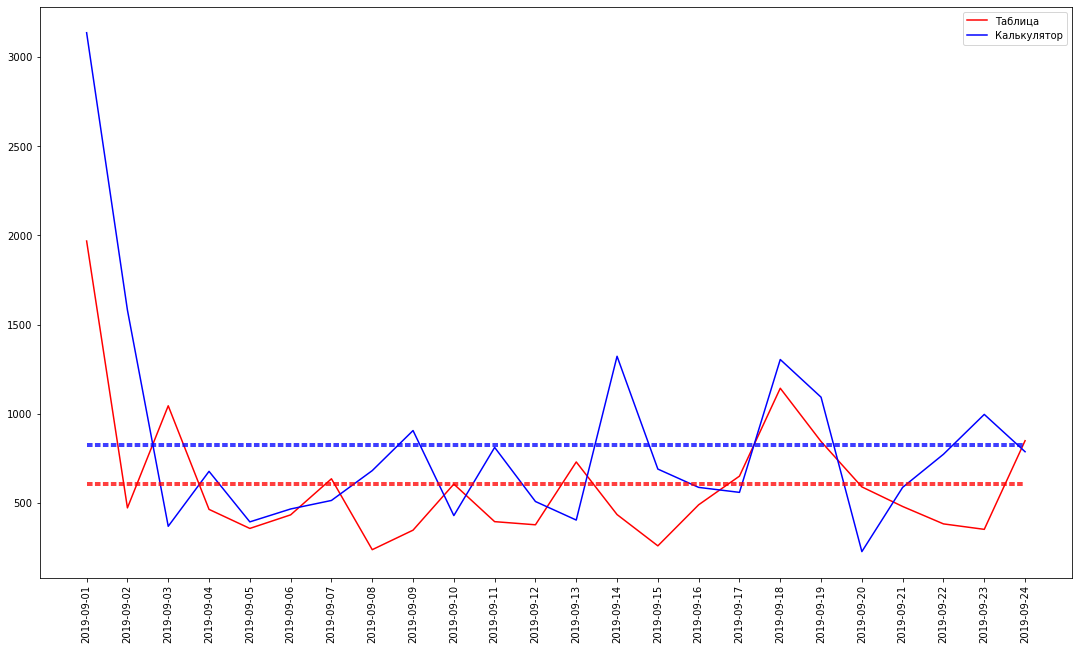

In [93]:
fig=plt.figure()
fig.set_size_inches(18.5, 10.5)
ax=fig.add_subplot(111)
ax.plot(table['date'], table['mean'], c='r', label='Таблица')
ax.plot(calculator['date'], calculator['mean'], c='b', label='Калькулятор')
ax.plot(calculator['date'], [test_group[0] for i in calculator['date']], c='b', ls='--')
ax.plot(calculator['date'], [test_group[1] for i in calculator['date']], c='b', ls='--')
ax.plot(table['date'], [control_group[0] for i in table['date']], c='r', ls='--')
ax.plot(table['date'], [control_group[1] for i in table['date']], c='r', ls='--')
ax.legend()
ax.set_xticklabels(table['date'], rotation='vertical')
fig.show()

In [94]:
interval = [0.9, 0.95]
for i in interval:
    print(f'Статистика для суммарной покупки за день с вероятностью {i}')
    control_group = stm.DescrStatsW(table['sum(addToCartItems)']).tconfint_mean(i)
    print(f'Для версии сайта с таблицей {control_group[0]}, {control_group[1]}')
    test_group = stm.DescrStatsW(calculator['sum(addToCartItems)']).tconfint_mean(i)
    print(f'Для версии сайта с калькулятором {test_group[0]}, {test_group[1]}\n')

Статистика для суммарной покупки за день с вероятностью 0.9
Для версии сайта с таблицей 29640.130270278503, 31034.619729721497
Для версии сайта с калькулятором 38565.35601473178, 40314.14398526822

Статистика для суммарной покупки за день с вероятностью 0.95
Для версии сайта с таблицей 29989.485746017992, 30685.264253982008
Для версии сайта с калькулятором 39003.47238002742, 39876.02761997258



<ipython-input-95-490aa16e434c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(table['date'], rotation='vertical')
<ipython-input-95-490aa16e434c>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


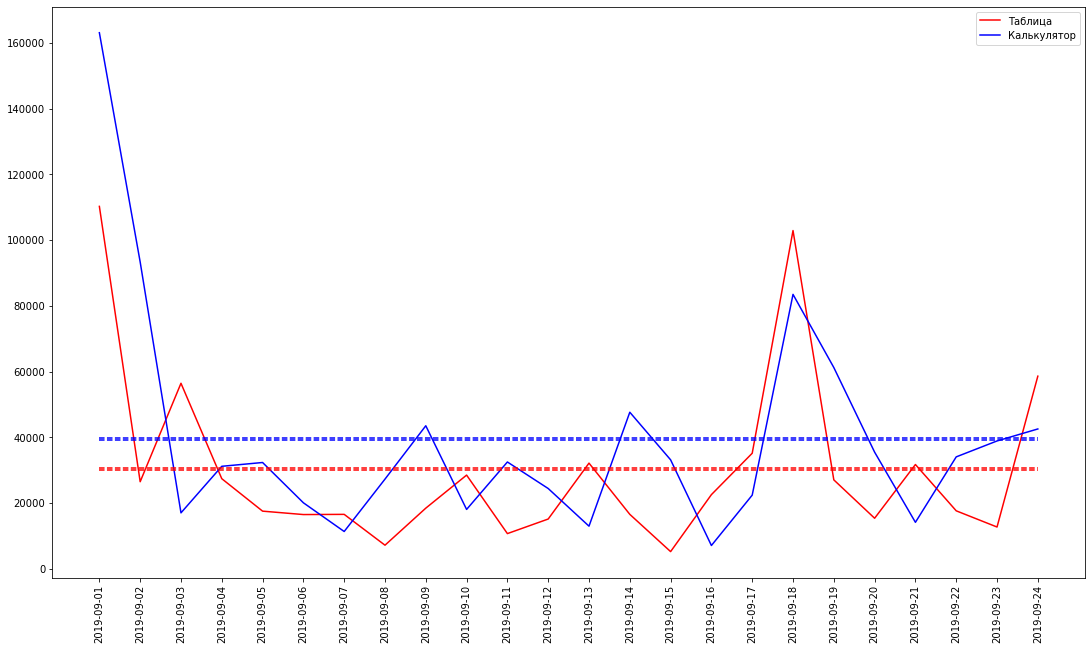

In [95]:
fig=plt.figure()
fig.set_size_inches(18.5, 10.5)
ax=fig.add_subplot(111)
ax.plot(table['date'], table['sum(addToCartItems)'], c='r', label='Таблица')
ax.plot(calculator['date'], calculator['sum(addToCartItems)'], c='b', label='Калькулятор')
ax.plot(calculator['date'], [test_group[0] for i in calculator['date']], c='b', ls='--')
ax.plot(calculator['date'], [test_group[1] for i in calculator['date']], c='b', ls='--')
ax.plot(table['date'], [control_group[0] for i in table['date']], c='r', ls='--')
ax.plot(table['date'], [control_group[1] for i in table['date']], c='r', ls='--')
ax.legend()
ax.set_xticklabels(table['date'], rotation='vertical')
fig.show()

После исключения значения выброса вариант с выпадающим калькулятором выглядит предпочтительным по 2 метрикам: средней стоимости и суммарной стоимости заказа за день.
Но у нас выборка в 24 дня, что крайне мало. Сделаем проверку с помощью А/В тестирования. Гипотеза 0: разницы между ними нет. Проверим на средней стоимости покупки.

In [100]:
p_old = table['mean'].mean()
p_new = calculator['mean'].mean()
print(p_old, p_new, p_new-p_old)

606.1088564900697 825.3121029001577 219.203246410088


In [101]:
differences = np.zeros((1, 1500)) 
for i in range(0, 1500):
    s1 = random.choices(table['mean'], k = 800)
    s2 = random.choices(calculator['mean'], k = 800)
    p1 = np.mean(s1)
    p2 = np.mean(s2)
    differences[0][i] = p2 - p1

In [102]:
((differences - np.mean(differences)) >= (p_new-p_old)).sum()

0

Видим, что гипотеза не подтвердилась. В таком случае надо уточнить какой вариант лучше.

In [108]:
differences = np.zeros((3, 1500)) 
for i in range(0, 1500):
    s1 = random.choices(table['mean'], k = 800)
    s2 = random.choices(calculator['mean'], k = 800)
    p1 = np.mean(s1)
    p2 = np.mean(s2)
    differences[0][i] = p1
    differences[1][i] = p2
    differences[2][i] = p2 - p1

In [112]:
table_int = stm.DescrStatsW(differences[0]).tconfint_mean(0.95)
calc_int = stm.DescrStatsW(differences[1]).tconfint_mean(0.95)
print(f'Для выпадающей таблицы имеем доверительный интервал {table_int[0], table_int[1]}')
print(f'Для выпадающего калькулятора имеем доверительный интервал {calc_int[0], calc_int[1]}')

Для выпадающей таблицы имеем доверительный интервал (606.3936514614627, 606.4363846214585)
Для выпадающего калькулятора имеем доверительный интервал (825.9740767362879, 826.0404856552522)


На примере видем, что разница значительна и в пользу выпадающего калькулятора.

#### По имеющимся данным с учетом невозможности выяснить что за выброс был 25.09 выпадающий калькулятор выглядит предпочтительным вариантом.